In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
data = pd.read_csv(url)

In [32]:
df = data.loc[:,['lstat', 'medv']]
X = data[['lstat']]
y = data[['medv']]


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

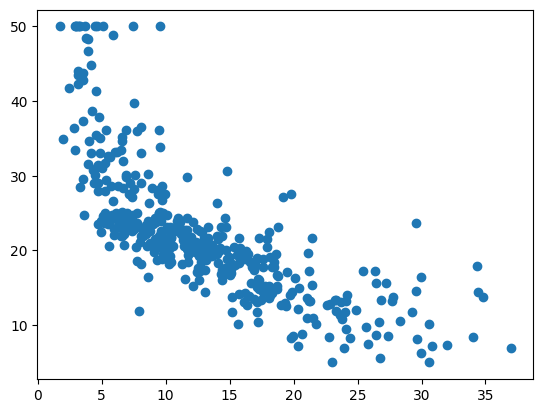

In [34]:
plt.scatter(X_train,y_train)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R2 score: {r2_score(y_test, pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, pred)}')

R2 score: 0.4902618098232455
Mean Absolute Error (MAE): 4.963278567899735
Mean Squared Error (MSE): 42.173574260599686


# X_train을 사용하여 다항식 특성 생성

In [37]:
# 데이터를 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=2, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# LinearRegression 모델 학습
lr = LinearRegression()
lr.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
lr_poly_pred = lr.predict(X_poly_test)


In [39]:
# 계수와 절편 출력
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [[-2.37817785  0.04437967]]
Intercept: [43.32661733]


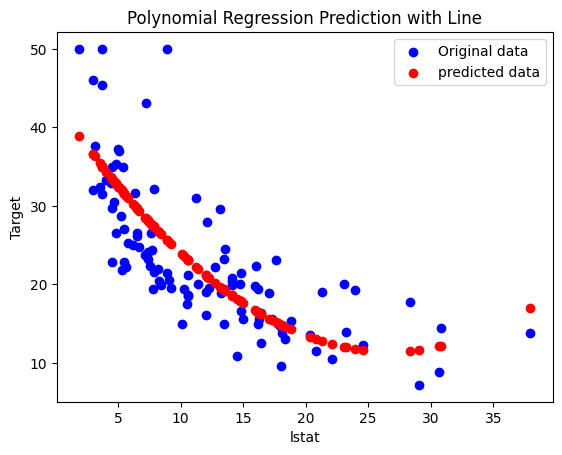

In [40]:
# 원본 데이터의 산점도
plt.scatter(X_test, y_test, color='blue', label='Original data')

# 예측된 데이터의 산점도 (예측선 그리기는 다차원에서 복잡하므로 여기서는 생략)
plt.scatter(X_test, lr_poly_pred, color='red', label='predicted data')

plt.xlabel('lstat')
plt.ylabel('Target')
plt.title('Polynomial Regression Prediction with Line')
plt.legend()
plt.show()

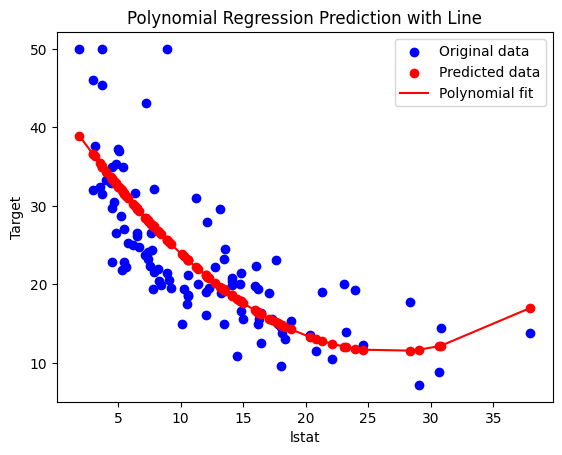

In [41]:
# 예측 데이터 포인트를 X_test의 첫 번째 특성에 따라 정렬
sorted_indices = np.argsort(X_test.iloc[:, 0].values)
X_test_sorted = X_test.iloc[sorted_indices]  # 전체 행을 정렬된 순서로 선택
lr_poly_pred_sorted = lr_poly_pred[sorted_indices]

# 원본 데이터의 산점도
plt.scatter(X_test_sorted.iloc[:, 0], y_test.iloc[sorted_indices], color='blue', label='Original data')

# 예측 데이터 포인트의 산점도 및 회귀선
plt.scatter(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Predicted data')
plt.plot(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Polynomial fit')

plt.xlabel('lstat')
plt.ylabel('Target')
plt.title('Polynomial Regression Prediction with Line')
plt.legend()
plt.show()

# 교차 검증으로 판단하는 법

### 학습곡선으로 편향/분산 검증

* 학습곡선으로는 편향과 분산을 검증할수있다
* 편향(bias)이 높으면 (=underfitting) 훈련 정확도, 교차 검증 정확도가 모두 낮게 나타남
* 분산(variance)이 높으면 (=overfitting) 훈련 정확도, 교차 검증 정확도의 차이가 크게 나타남


#### 낮은 차수(degree=2)를 사용해서 비교


Coefficients: [[-2.37817785  0.04437967]]
Intercept: [43.32661733]
R2 score: 0.5924658205706047
Mean Absolute Error (MAE): 4.528776809170454
Mean Squared Error (MSE): 33.71764821846764


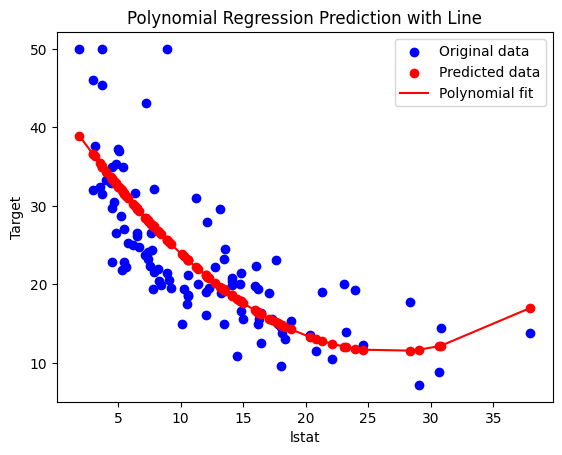

In [137]:
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=2, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# LinearRegression 모델 학습
lr = LinearRegression()
lr.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
lr_poly_pred = lr.predict(X_poly_test)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print(f'R2 score: {r2_score(y_test, lr_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, lr_poly_pred)}')

# 예측 데이터 포인트를 X_test의 첫 번째 특성에 따라 정렬
sorted_indices = np.argsort(X_test.iloc[:, 0].values)
X_test_sorted = X_test.iloc[sorted_indices]  # 전체 행을 정렬된 순서로 선택
lr_poly_pred_sorted = lr_poly_pred[sorted_indices]

# 원본 데이터의 산점도
plt.scatter(X_test_sorted.iloc[:, 0], y_test.iloc[sorted_indices], color='blue', label='Original data')

# 예측 데이터 포인트의 산점도 및 회귀선
plt.scatter(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Predicted data')
plt.plot(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Polynomial fit')

plt.xlabel('lstat')
plt.ylabel('Target')
plt.title('Polynomial Regression Prediction with Line')
plt.legend()
plt.show()

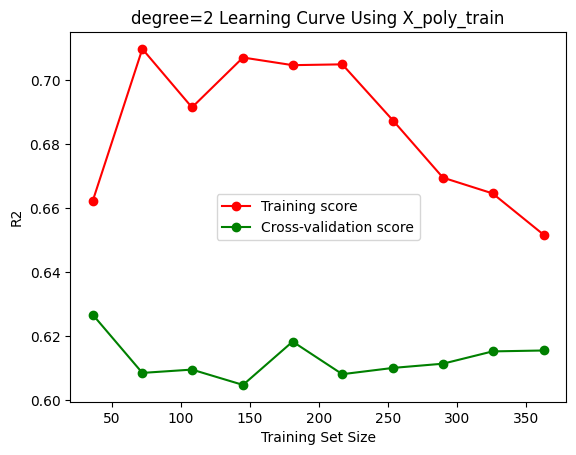

In [138]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LinearRegression(), X=X_poly_train, y=y_train,train_sizes=np.linspace(0.1,1.0,10), cv=10, scoring='r2', random_state=123)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("degree=2 Learning Curve Using X_poly_train")
plt.xlabel("Training Set Size")
plt.ylabel("R2")
plt.legend(loc="best")
#plt.savefig('LR_model, degree=2 Learning Curve.png',bbox_inches='tight')
plt.show()


훈련 점수가 일정하게 높지 않고, 교차 검증 점수와의 차이도 크지 않은 경향을 보입니다. 이는 모델이 데이터의 복잡성을 충분히 포착하지 못하고 있어 약간의 편향이 있을 수 있음을 나타냅니다. 하지만 분산은 상대적으로 낮은 편으로 보입니다.

#### 차수(degree=3)를 사용해서 비교¶

Coefficients: [[-4.00319351e+00  1.56492902e-01 -2.15761365e-03]]
Intercept: [49.48177208]
R2 score: 0.6048228596601005
Mean Absolute Error (MAE): 4.434697605976721
Mean Squared Error (MSE): 32.69527925391884


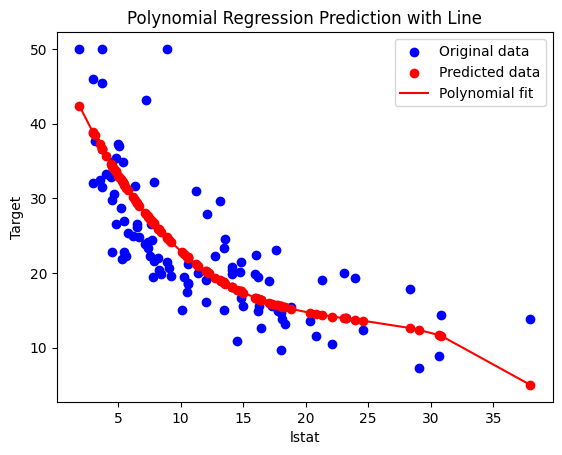

In [139]:
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=3, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# LinearRegression 모델 학습
lr = LinearRegression()
lr.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
lr_poly_pred = lr.predict(X_poly_test)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print(f'R2 score: {r2_score(y_test, lr_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, lr_poly_pred)}')


# 예측 데이터 포인트를 X_test의 첫 번째 특성에 따라 정렬
sorted_indices = np.argsort(X_test.iloc[:, 0].values)
X_test_sorted = X_test.iloc[sorted_indices]  # 전체 행을 정렬된 순서로 선택
lr_poly_pred_sorted = lr_poly_pred[sorted_indices]

# 원본 데이터의 산점도
plt.scatter(X_test_sorted.iloc[:, 0], y_test.iloc[sorted_indices], color='blue', label='Original data')

# 예측 데이터 포인트의 산점도 및 회귀선
plt.scatter(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Predicted data')
plt.plot(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Polynomial fit')

plt.xlabel('lstat')
plt.ylabel('Target')
plt.title('Polynomial Regression Prediction with Line')
plt.legend()
plt.show()

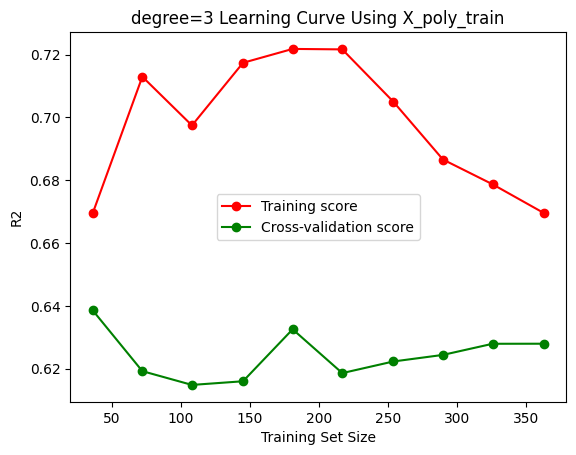

In [140]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LinearRegression(), X=X_poly_train, y=y_train,train_sizes=np.linspace(0.1,1.0,10), cv=10, scoring='r2', random_state=123)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("degree=3 Learning Curve Using X_poly_train")
plt.xlabel("Training Set Size")
plt.ylabel("R2")
plt.legend(loc="best")
#plt.savefig('LR_model, degree=3 Learning Curve.png',bbox_inches='tight')
plt.show()

훈련 점수가 매우 높지만 교차 검증 점수가 상대적으로 낮고, 두 점수 사이의 간격이 큰 것으로 보아 분산이 높습니다. 이는 모델이 훈련 데이터에는 잘 적합되지만 새로운 데이터에 대해서는 일반화를 잘 못한다는 과적합의 신호입니다.

#### 차수(degree=4)를 사용해서 비교¶

Coefficients: [[-7.29662586e+00  5.22461665e-01 -1.75073052e-02  2.13024649e-04]]
Intercept: [58.42630854]
R2 score: 0.621485167777125
Mean Absolute Error (MAE): 4.2819484677799045
Mean Squared Error (MSE): 31.316710603838573


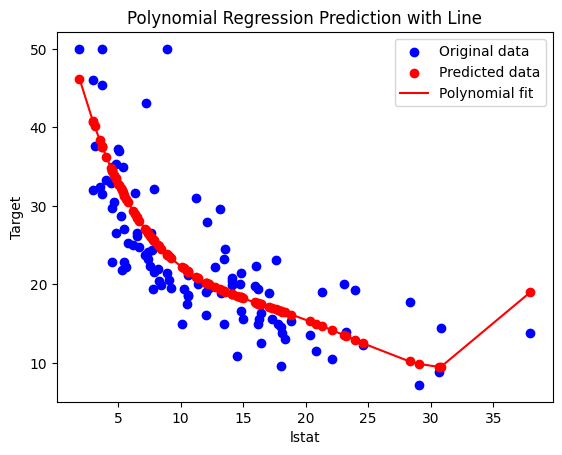

In [141]:
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=4, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# LinearRegression 모델 학습
lr = LinearRegression()
lr.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
lr_poly_pred = lr.predict(X_poly_test)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print(f'R2 score: {r2_score(y_test, lr_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, lr_poly_pred)}')

# 예측 데이터 포인트를 X_test의 첫 번째 특성에 따라 정렬
sorted_indices = np.argsort(X_test.iloc[:, 0].values)
X_test_sorted = X_test.iloc[sorted_indices]  # 전체 행을 정렬된 순서로 선택
lr_poly_pred_sorted = lr_poly_pred[sorted_indices]

# 원본 데이터의 산점도
plt.scatter(X_test_sorted.iloc[:, 0], y_test.iloc[sorted_indices], color='blue', label='Original data')

# 예측 데이터 포인트의 산점도 및 회귀선
plt.scatter(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Predicted data')
plt.plot(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Polynomial fit')

plt.xlabel('lstat')
plt.ylabel('Target')
plt.title('Polynomial Regression Prediction with Line')
plt.legend()
plt.show()

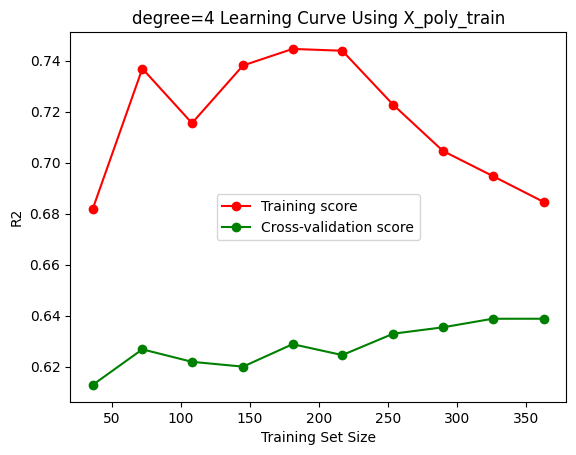

In [142]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LinearRegression(), X=X_poly_train, y=y_train,train_sizes=np.linspace(0.1,1.0,10), cv=10, scoring='r2', random_state=123)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("degree=4 Learning Curve Using X_poly_train")
plt.xlabel("Training Set Size")
plt.ylabel("R2")
plt.legend(loc="best")
#plt.savefig('LR_model, degree=4 Learning Curve.png',bbox_inches='tight')
plt.show()

훈련 점수가 높게 유지되는 반면, 교차 검증 점수는 상대적으로 낮고 일정한 패턴을 보이지 않습니다. 이는 모델이 훈련 데이터에는 잘 적합되었지만, 새로운 데이터에 대한 일반화가 다소 부족함을 시사합니다. 즉, 훈련 점수와 교차 검증 점수 사이의 간격이 분산을 나타내며, 이 모델은 어느 정도의 높은 분산(overfitting)을 가지고 있을 가능성이 있습니다.

#### 높은 차수(degree=5)를 사용해서 비교

Coefficients: [[-1.27917003e+01  1.39392654e+00 -7.66765196e-02  1.98924267e-03
  -1.93359955e-05]]
Intercept: [69.81904739]
R2 score: 0.6242028599939282
Mean Absolute Error (MAE): 4.207395433238322
Mean Squared Error (MSE): 31.091860285122884


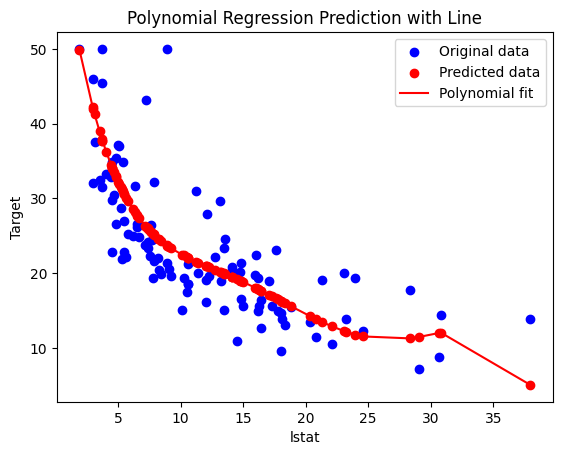

In [143]:
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=5, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# LinearRegression 모델 학습
lr = LinearRegression()
lr.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
lr_poly_pred = lr.predict(X_poly_test)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print(f'R2 score: {r2_score(y_test, lr_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, lr_poly_pred)}')

# 예측 데이터 포인트를 X_test의 첫 번째 특성에 따라 정렬
sorted_indices = np.argsort(X_test.iloc[:, 0].values)
X_test_sorted = X_test.iloc[sorted_indices]  # 전체 행을 정렬된 순서로 선택
lr_poly_pred_sorted = lr_poly_pred[sorted_indices]

# 원본 데이터의 산점도
plt.scatter(X_test_sorted.iloc[:, 0], y_test.iloc[sorted_indices], color='blue', label='Original data')

# 예측 데이터 포인트의 산점도 및 회귀선
plt.scatter(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Predicted data')
plt.plot(X_test_sorted.iloc[:, 0], lr_poly_pred_sorted, color='red', label='Polynomial fit')

plt.xlabel('lstat')
plt.ylabel('Target')
plt.title('Polynomial Regression Prediction with Line')
plt.legend()
plt.show()

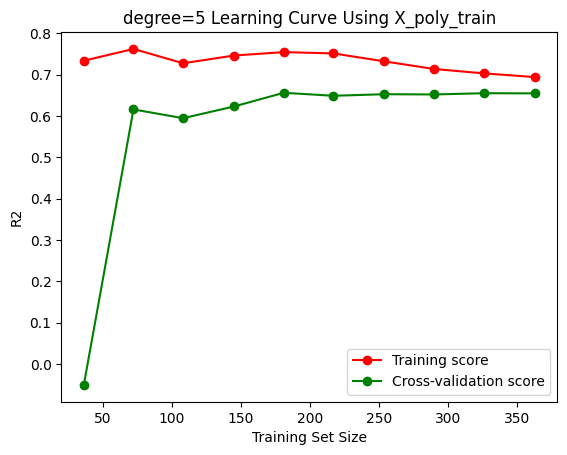

In [144]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LinearRegression(), X=X_poly_train, y=y_train,train_sizes=np.linspace(0.1,1.0,10), cv=10, scoring='r2', random_state=123)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("degree=5 Learning Curve Using X_poly_train")
plt.xlabel("Training Set Size")
plt.ylabel("R2")
plt.legend(loc="best")
#plt.savefig('LR_model, degree=5 Learning Curve.png',bbox_inches='tight')
plt.show()

훈련 점수는 매우 높으며, 교차 검증 점수도 이전 모델들에 비해 상당히 높은 값을 유지하고 있습니다. 이는 모델이 데이터에 잘 적합되고 있으며, 또한 새로운 데이터에 대해서도 꽤 좋은 일반화 성능을 보이고 있음을 나타냅니다. 훈련 점수와 교차 검증 점수의 간격이 상대적으로 좁아졌기 때문에, 이 모델은 낮은 분산을 가짐과 동시에 낮은 편향을 가지고 있다고 볼 수 있습니다.

# Ridge회귀 Validation curve로 과대적합/과소적합 판단하기

각 그래프의 과대적합 및 과소적합 여부를 판단하는 방법은 훈련 점수(Training score)와 교차 검증 점수(Cross-validation score)의 변화와 이 둘 사이의 간격을 보는 것입니다. 다음은 각도(Degree)에 따른 그래프의 해석과 판단 기준입니다.

검증 곡선은 모델 파라미터 값을 그리는 곡선

과소적합과 과대적합의 경우를 구분하기 위해, 두 선의 간격을 보면 됩니다:
* 과소적합: 훈련 점수와 교차 검증 점수 모두 낮을 때. 두 선이 서로 가깝고, 둘 다 높은 오차를 나타내면 모델이 과소적합되었을 가능성이 높습니다. 
* 과대적합: 훈련 점수는 높으나 교차 검증 점수가 상대적으로 낮을 때. 훈련 점수는 높지만 교차 검증 점수가 상대적으로 낮아 두 선 사이의 간격이 크면 과대적합이 일어났을 가능성이 높습니다.
* 적절한 적합: 두 점수가 모두 높으며 교차 검증 점수가 훈련 점수에 가까울 때.

## Ridge회귀

Coefficients: [[-0.96457211]]
Intercept: [34.7457241]
R2 score: 0.4902660056137057
Mean Absolute Error (MAE): 4.963235780823063
Mean Squared Error (MSE): 42.173227118706144
alpha-parameters:  [1.00000000e-01 2.64105263e+01 5.27210526e+01 7.90315789e+01
 1.05342105e+02 1.31652632e+02 1.57963158e+02 1.84273684e+02
 2.10584211e+02 2.36894737e+02 2.63205263e+02 2.89515789e+02
 3.15826316e+02 3.42136842e+02 3.68447368e+02 3.94757895e+02
 4.21068421e+02 4.47378947e+02 4.73689474e+02 5.00000000e+02]


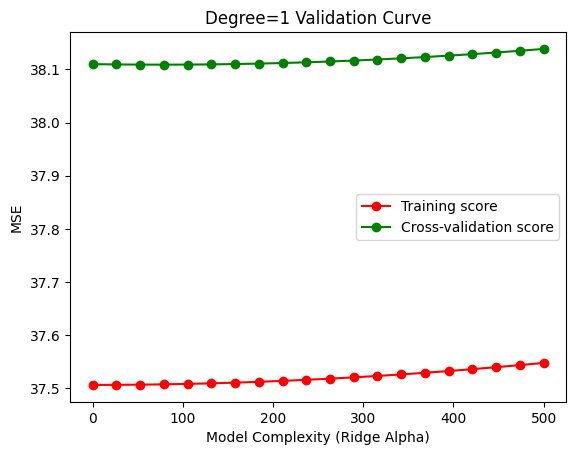

In [176]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=1, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# RidgeRegression 모델 학습
ridge = Ridge(random_state=123)
ridge.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
ridge_poly_pred = ridge.predict(X_poly_test)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print(f'R2 score: {r2_score(y_test, ridge_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, ridge_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, ridge_poly_pred)}')

from sklearn.model_selection import validation_curve

param_range = np.linspace(0.1,500,20)
print('alpha-parameters: ',param_range)
train_scores, test_scores = validation_curve(
    Ridge(), X_poly_train, y_train, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

plt.plot(param_range, -train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, -test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Degree=1 Validation Curve")
plt.xlabel("Model Complexity (Ridge Alpha)")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.savefig('Poly_Ridge_model degree=1 validation Curve.png',bbox_inches='tight')
plt.show()

도수 1: 훈련 점수와 교차 검증 점수가 모두 비교적 낮고, 두 점수 사이의 간격이 매우 좁습니다. 이는 모델이 데이터에 충분히 복잡하지 않아 과소적합될 가능성이 높다는 것을 나타냅니다.

Coefficients: [[-2.37660207  0.04433384]]
Intercept: [43.31626822]
R2 score: 0.5924999089996967
Mean Absolute Error (MAE): 4.528317250103572
Mean Squared Error (MSE): 33.71482788653363
alpha-parameters:  [1.00000000e-01 2.64105263e+01 5.27210526e+01 7.90315789e+01
 1.05342105e+02 1.31652632e+02 1.57963158e+02 1.84273684e+02
 2.10584211e+02 2.36894737e+02 2.63205263e+02 2.89515789e+02
 3.15826316e+02 3.42136842e+02 3.68447368e+02 3.94757895e+02
 4.21068421e+02 4.47378947e+02 4.73689474e+02 5.00000000e+02]


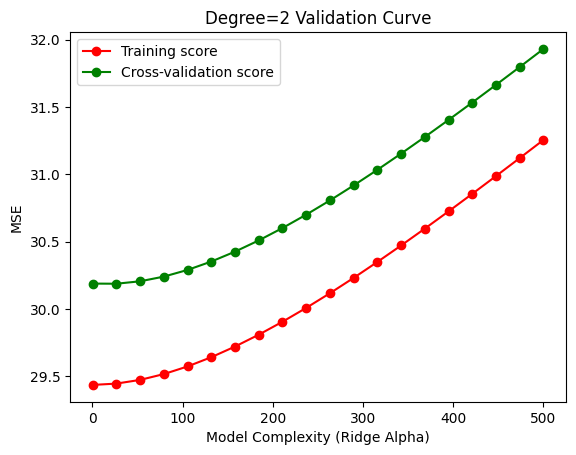

In [177]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=2, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# RidgeRegression 모델 학습
ridge = Ridge(random_state=123)
ridge.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
ridge_poly_pred = ridge.predict(X_poly_test)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print(f'R2 score: {r2_score(y_test, ridge_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, ridge_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, ridge_poly_pred)}')

from sklearn.model_selection import validation_curve

param_range = np.linspace(0.1,500,20)
print('alpha-parameters: ',param_range)
train_scores, test_scores = validation_curve(
    Ridge(), X_poly_train, y_train, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

plt.plot(param_range, -train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, -test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Degree=2 Validation Curve")
plt.xlabel("Model Complexity (Ridge Alpha)")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.savefig('Poly_Ridge_model degree=2 validation Curve.png',bbox_inches='tight')
plt.show()

도수 2: 훈련 점수가 교차 검증 점수보다 높으며, 모델의 복잡도가 증가함에 따라 두 점수의 차이도 점차 증가합니다. 이는 모델이 약간의 과대적합 경향을 보이고 있음을 나타냅니다.

Coefficients: [[-3.98326957e+00  1.55223769e-01 -2.13466838e-03]]
Intercept: [49.39895979]
R2 score: 0.605021367861879
Mean Absolute Error (MAE): 4.434141814827542
Mean Squared Error (MSE): 32.67885552787599
alpha-parameters:  [1.00000000e-01 2.64105263e+01 5.27210526e+01 7.90315789e+01
 1.05342105e+02 1.31652632e+02 1.57963158e+02 1.84273684e+02
 2.10584211e+02 2.36894737e+02 2.63205263e+02 2.89515789e+02
 3.15826316e+02 3.42136842e+02 3.68447368e+02 3.94757895e+02
 4.21068421e+02 4.47378947e+02 4.73689474e+02 5.00000000e+02]


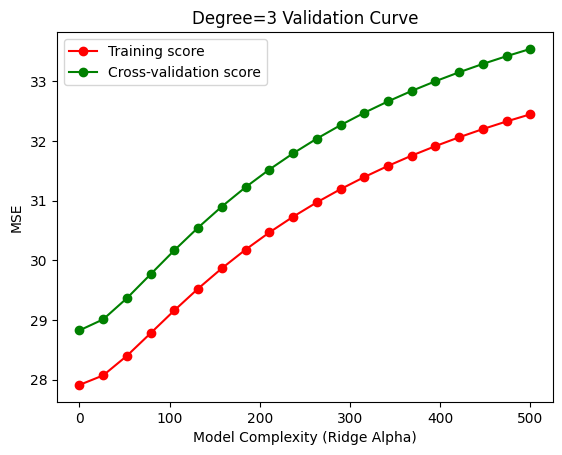

In [178]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=3, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# RidgeRegression 모델 학습
ridge = Ridge(random_state=123)
ridge.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
ridge_poly_pred = ridge.predict(X_poly_test)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print(f'R2 score: {r2_score(y_test, ridge_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, ridge_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, ridge_poly_pred)}')

from sklearn.model_selection import validation_curve

param_range = np.linspace(0.1,500,20)
print('alpha-parameters: ',param_range)
train_scores, test_scores = validation_curve(
    Ridge(), X_poly_train, y_train, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

plt.plot(param_range, -train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, -test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Degree=3 Validation Curve")
plt.xlabel("Model Complexity (Ridge Alpha)")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.savefig('Poly_Ridge_model degree=3 validation Curve.png',bbox_inches='tight')
plt.show()

도수 3: 이 경우에도 도수 2와 유사한 경향을 보이지만, 훈련 점수와 교차 검증 점수 사이의 간격이 조금 더 커진 것으로 보입니다. 이는 과대적합이 도수 2보다 더 심화되고 있음을 나타냅니다.

Coefficients: [[-7.10728045e+00  5.03110495e-01 -1.67498159e-02  2.03081558e-04]]
Intercept: [57.86077234]
R2 score: 0.6222223097937458
Mean Absolute Error (MAE): 4.283007542408089
Mean Squared Error (MSE): 31.255722602198393
alpha-parameters:  [1.00000000e-01 2.64105263e+01 5.27210526e+01 7.90315789e+01
 1.05342105e+02 1.31652632e+02 1.57963158e+02 1.84273684e+02
 2.10584211e+02 2.36894737e+02 2.63205263e+02 2.89515789e+02
 3.15826316e+02 3.42136842e+02 3.68447368e+02 3.94757895e+02
 4.21068421e+02 4.47378947e+02 4.73689474e+02 5.00000000e+02]


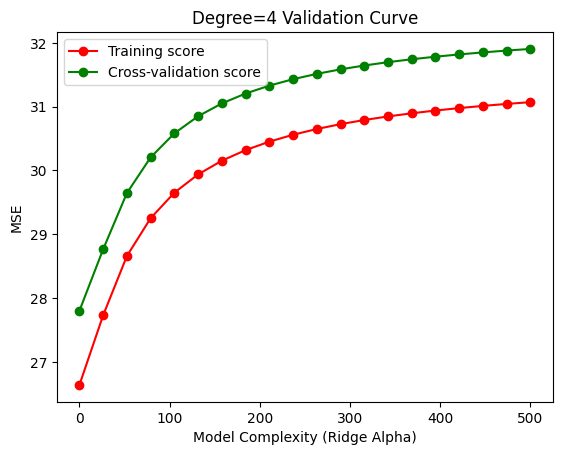

In [179]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=4, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# RidgeRegression 모델 학습
ridge = Ridge(random_state=123)
ridge.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
ridge_poly_pred = ridge.predict(X_poly_test)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print(f'R2 score: {r2_score(y_test, ridge_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, ridge_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, ridge_poly_pred)}')

param_range = np.linspace(0.1,500,20)
print('alpha-parameters: ',param_range)
train_scores, test_scores = validation_curve(
    Ridge(), X_poly_train, y_train, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

plt.plot(param_range, -train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, -test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Degree=4 Validation Curve")
plt.xlabel("Model Complexity (Ridge Alpha)")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.savefig('Poly_Ridge_model degree=4 validation Curve.png',bbox_inches='tight')
plt.show()

도수 4: 여기에서는 훈련 점수와 교차 검증 점수가 모두 증가하고, alpha 값이 증가함에 따라 교차 검증 점수가 안정화되는 구간이 있습니다. 이는 적절한 모델 복잡도에서 일반화가 잘 이루어지고 있음을 나타내지만, 낮은 alpha 값에서는 여전히 과대적합의 위험이 있습니다.

Coefficients: [[-1.13964401e+01  1.18982741e+00 -6.37141488e-02  1.62071358e-03
  -1.54983790e-05]]
Intercept: [66.64812916]
R2 score: 0.6281089077504967
Mean Absolute Error (MAE): 4.217275044676107
Mean Squared Error (MSE): 30.768690473047467
alpha-parameters:  [1.00000000e-01 2.64105263e+01 5.27210526e+01 7.90315789e+01
 1.05342105e+02 1.31652632e+02 1.57963158e+02 1.84273684e+02
 2.10584211e+02 2.36894737e+02 2.63205263e+02 2.89515789e+02
 3.15826316e+02 3.42136842e+02 3.68447368e+02 3.94757895e+02
 4.21068421e+02 4.47378947e+02 4.73689474e+02 5.00000000e+02]


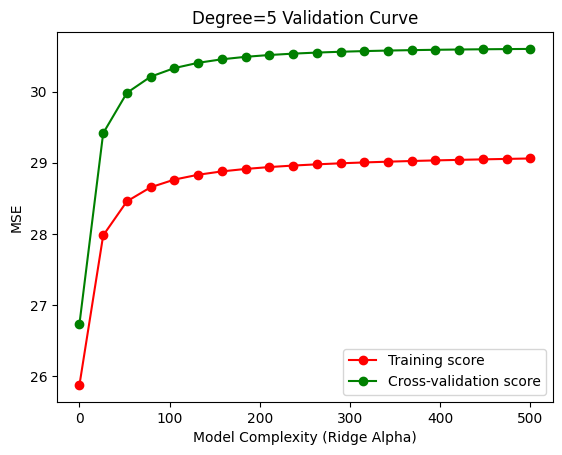

In [180]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=5, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# RidgeRegression 모델 학습
ridge = Ridge(random_state=123)
ridge.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
ridge_poly_pred = ridge.predict(X_poly_test)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print(f'R2 score: {r2_score(y_test, ridge_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, ridge_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, ridge_poly_pred)}')

param_range = np.linspace(0.1,500,20)
print('alpha-parameters: ',param_range)
train_scores, test_scores = validation_curve(
    Ridge(), X_poly_train, y_train, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

plt.plot(param_range, -train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, -test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Degree=5 Validation Curve")
plt.xlabel("Model Complexity (Ridge Alpha)")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.savefig('Poly_Ridge_model degree=5 validation Curve.png',bbox_inches='tight')
plt.show()

도수 5: 훈련 점수가 매우 높으며 교차 검증 점수와의 간격이 더욱 벌어집니다. 이는 모델이 훈련 데이터에 매우 잘 적합되어 있지만, 검증 데이터에 대해서는 그만큼 잘 일반화하지 못하고 있음을 의미합니다. 이는 과대적합을 나타냅니다.


* 도수 1 모델은 과소적합될 가능성이 있습니다. 훈련 점수와 교차 검증 점수가 모두 낮기 때문입니다.
* 도수 2와 도수 3 모델은 교차 검증 점수가 증가하긴 하지만, 훈련 점수와의 간격이 넓어지고 있어 약간의 과대적합이 있는 것으로 보입니다.
* 도수 4 모델은 훈련 점수와 교차 검증 점수가 상대적으로 높으면서도 간격이 비교적 좁은 상태를 유지하고 있습니다. 이는 모델이 복잡도와 일반화 사이에서 좋은 균형을 찾고 있음을 나타냅니다.
* 도수 5 모델은 과대적합의 징후를 보입니다. 훈련 점수가 매우 높지만 교차 검증 점수와의 간격이 큽니다.

이 정보를 종합해보면, 도수 4 모델이 훈련 점수와 교차 검증 점수가 높으며, 두 점수 사이의 간격이 상대적으로 좁아 최적의 도수로 선택하는 것이 타당해 보입니다. 이 모델은 적절한 복잡도를 갖고 있어 과소적합이나 과대적합을 피하면서도 데이터를 잘 설명할 수 있을 것으로 예상됩니다.

## Lasso회귀

In [29]:
from sklearn.linear_model import Lasso
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=3, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# LassoRegression 모델 학습
lasso = Lasso(random_state=123)
lasso.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
lasso_poly_pred = lasso.predict(X_poly_test)

print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print(f'R2 score: {r2_score(y_test, lasso_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, lasso_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, lasso_poly_pred)}')

Coefficients: [-1.85787534e+00  1.94714155e-02  3.24651658e-04]
Intercept: [40.59305978]
R2 score: 0.5876833879909229
Mean Absolute Error (MAE): 4.518835825368192
Mean Squared Error (MSE): 34.11332639097338


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+01, tolerance: 3.423e+00
  model = cd_fast.enet_coordinate_descent(


## ElasticNet회귀

In [27]:
from sklearn.linear_model import ElasticNet
# PolynomialFeatures를 사용하여 데이터 변환
pf = PolynomialFeatures(degree=3, include_bias=False)# 다항식의 차수
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.transform(X_test)# 주의: fit_transform이 아닌 transform을 사용

# ElasticNetRegression 모델 학습
elas = ElasticNet(random_state=123)
elas.fit(X_poly_train,y_train)

# 훈련된 모델로부터 예측 수행
elas_poly_pred = elas.predict(X_poly_test)

print("Coefficients:", elas.coef_)
print("Intercept:", elas.intercept_)
print(f'R2 score: {r2_score(y_test, elas_poly_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, elas_poly_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, elas_poly_pred)}')

Coefficients: [-1.52476515e+00 -1.15968475e-03  6.89643037e-04]
Intercept: [39.16356378]
R2 score: 0.5784919143939034
Mean Absolute Error (MAE): 4.571652644604734
Mean Squared Error (MSE): 34.87378990298496


In [ ]:
'''
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 10)
train_scores, test_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

plt.plot(param_range, -train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, -test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Validation Curve")
plt.xlabel("Model Complexity (Ridge Alpha)")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()
'''